In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import warnings

warnings.filterwarnings('ignore')

In [24]:
train_data = pd.read_csv("train_data.txt", sep=':::', names=['id', 'title', 'genre', 'description'], engine='python')
test_data = pd.read_csv("test_data.txt", sep=':::', names=['id', 'title', 'genre', 'description'], engine='python')
test_sol_data = pd.read_csv("test_data_solution.txt", sep=':::', names=['id', 'title', 'genre', 'description'], engine='python')

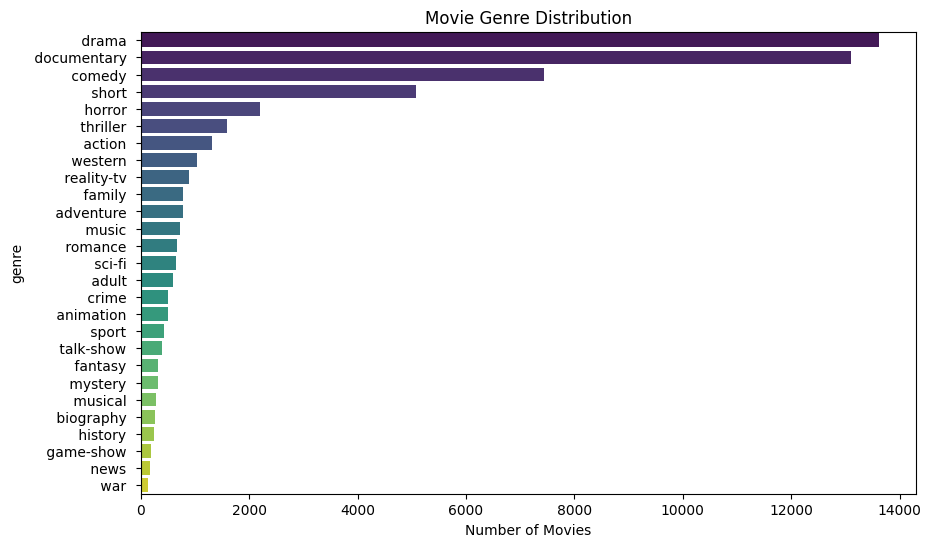

In [25]:

train_data = pd.read_csv("train_data.txt", sep=':::', names=['id', 'title', 'genre', 'description'], engine='python')
test_sol_data = pd.read_csv("test_data_solution.txt", sep=':::', names=['id', 'title', 'genre', 'description'], engine='python')


plt.figure(figsize=(10, 6))
sns.countplot(y=train_data['genre'], order=train_data['genre'].value_counts().index, palette='viridis')
plt.title('Movie Genre Distribution')
plt.xlabel('Number of Movies')
plt.show()

In [26]:
print(train_data.head())
print(train_data.shape)

   id                               title       genre  \
0   1       Oscar et la dame rose (2009)       drama    
1   2                       Cupid (1997)    thriller    
2   3   Young, Wild and Wonderful (1980)       adult    
3   4              The Secret Sin (1915)       drama    
4   5             The Unrecovered (2007)       drama    

                                         description  
0   Listening in to a conversation between his do...  
1   A brother and sister with a past incestuous r...  
2   As the bus empties the students for their fie...  
3   To help their unemployed father make ends mee...  
4   The film's title refers not only to the un-re...  
(54214, 4)


In [27]:

train_data['description'] = train_data['description'].fillna("").str.lower()
test_sol_data['description'] = test_sol_data['description'].fillna("").str.lower()

t_v = TfidfVectorizer(stop_words='english', max_features=10000)
X_train = t_v.fit_transform(train_data['description'])
X_test = t_v.transform(test_sol_data['description'])

le = LabelEncoder()
y_train = le.fit_transform(train_data['genre'])
y_test = le.transform(test_sol_data['genre'])

In [28]:
model = LinearSVC(dual=False)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2%}")
print(classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy: 57.39%
               precision    recall  f1-score   support

      action        0.41      0.34      0.37      1314
       adult        0.56      0.41      0.47       590
   adventure        0.41      0.21      0.28       775
   animation        0.33      0.16      0.21       498
   biography        0.00      0.00      0.00       264
      comedy        0.53      0.57      0.55      7446
       crime        0.23      0.08      0.11       505
 documentary        0.69      0.81      0.75     13096
       drama        0.56      0.70      0.62     13612
      family        0.32      0.15      0.20       783
     fantasy        0.29      0.09      0.14       322
   game-show        0.75      0.61      0.67       193
     history        0.12      0.02      0.03       243
      horror        0.60      0.61      0.61      2204
       music        0.60      0.50      0.55       731
     musical        0.30      0.07      0.12       276
     mystery        0.21      0.05      0.08   

In [29]:
print("accuracy of the model:")
print(accuracy_score(y_test, y_pred))

accuracy of the model:
0.5738745387453874


In [30]:
print("full report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

full report:
               precision    recall  f1-score   support

      action        0.41      0.34      0.37      1314
       adult        0.56      0.41      0.47       590
   adventure        0.41      0.21      0.28       775
   animation        0.33      0.16      0.21       498
   biography        0.00      0.00      0.00       264
      comedy        0.53      0.57      0.55      7446
       crime        0.23      0.08      0.11       505
 documentary        0.69      0.81      0.75     13096
       drama        0.56      0.70      0.62     13612
      family        0.32      0.15      0.20       783
     fantasy        0.29      0.09      0.14       322
   game-show        0.75      0.61      0.67       193
     history        0.12      0.02      0.03       243
      horror        0.60      0.61      0.61      2204
       music        0.60      0.50      0.55       731
     musical        0.30      0.07      0.12       276
     mystery        0.21      0.05      0.08       

In [31]:
def predict_genre(text):
    text_transformed = t_v.transform([text])
    prediction = model.predict(text_transformed)
    return le.inverse_transform(prediction)[0]

In [32]:
s1 = "a movie where police cashes the criminal and shoot him"
print("test 1 result:")
print(predict_genre(s1))

test 1 result:
 crime 


In [33]:
s2 = "a movie where person cashes a girl too get marry with him but girl refuses him."
print("test 2 result:")
print(predict_genre(s2))

test 2 result:
 drama 


In [34]:
s3 = "space travelers find a new planet with aliens and lasers"
print("test 3 result:")
print(predict_genre(s3))

test 3 result:
 sci-fi 
